In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from BSDE_Solver import BSDE_Solver

In [4]:
parameters = {
    "Q": tf.constant([[0.0, 0.0], [0.0, 0.0]]),
    'R': tf.constant([[0.0, 0.0], [0.0, 0.0]]),
    'S': tf.constant([[0.0, 0.0], [0.0, 0.0]]),
    'A': tf.constant([[0.5, 0.3], [0.3, 0.5]]),
    'B': tf.constant([[0.5, 0.1], [0.1, 0.5]]),
    'C': tf.constant([[0.3, 0.1], [0.1, 0.3]]),
    'D': tf.constant([[0.6, 0.2], [0.2, 0.6]]),
    'G': -tf.constant([[0.8, 0.1], [0.1, 0.8]]),
    'L': -tf.constant([[0.3], [0.5]]),
    'N': 10,
    'batch_size': 64,
    'iteration_steps': 10,
    'x_0': tf.Variable([[0.3], [0.1]]),
    'lr_gamma': 1e-2,
    'lr_pi': 1e-3
}

In [23]:
import numpy as np
import tensorflow as tf
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
dW = tf.random.normal(shape=(20, 30))

i = 19
a = tf.reshape(dW[i], (30, 1, 1))
a

<tf.Tensor: shape=(30, 1, 1), dtype=float32, numpy=
array([[[ 0.2802373 ]],

       [[-0.7477776 ]],

       [[ 0.53973454]],

       [[-1.8008573 ]],

       [[-0.00219157]],

       [[-1.0917804 ]],

       [[ 1.2253686 ]],

       [[ 0.05347844]],

       [[ 1.4252617 ]],

       [[ 0.3064292 ]],

       [[ 0.54265803]],

       [[ 0.9261877 ]],

       [[-0.08108319]],

       [[-1.6366011 ]],

       [[-0.4828828 ]],

       [[-0.7975657 ]],

       [[-1.0397358 ]],

       [[-0.3088169 ]],

       [[ 1.8962749 ]],

       [[ 0.789751  ]],

       [[-0.07705388]],

       [[ 1.2344799 ]],

       [[-0.01307967]],

       [[ 1.0624007 ]],

       [[ 0.36136186]],

       [[-0.7304841 ]],

       [[ 0.81400406]],

       [[ 0.9772201 ]],

       [[-0.89120466]],

       [[-0.11748514]]], dtype=float32)>

In [32]:
dW[10]

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([ 0.85091364,  0.37104946,  0.35534725,  1.1966163 , -0.7709734 ,
        0.05872349,  1.5624238 ,  0.5847179 ,  0.69299823, -0.29358536,
       -0.22394693,  0.8459064 , -0.5765418 ,  0.16430473,  1.6860806 ,
        0.185243  , -0.8702008 , -1.1853105 , -0.09496466,  1.3531914 ,
        0.6984996 ,  0.5321546 ,  0.4481701 , -1.2444612 ,  1.2454379 ,
       -0.2880971 ,  0.00409862, -1.0103524 , -1.1321403 , -0.22917788],
      dtype=float32)>

In [2]:
parameters = {
    "Q": tf.Variable([[3.0, 0.0], [0.0, 3.0]]),
    'R': tf.constant([[2.0, 0.0], [0.0, 2.0]]),
    'S': tf.Variable([[2.0, 3.0], [3.0, 2.0]]),
    'A': tf.Variable([[0.5, 0.3], [0.3, 0.5]]),
    'B': tf.Variable([[0.2, 0.1], [0.1, 0.2]]),
    'C': tf.Variable([[0.3, 0.1], [0.1, 0.3]]),
    'D': tf.Variable([[0.1, 0.2], [0.2, 0.1]]),
    'G': tf.constant([[2.0, 0.0], [0.0, 2.0]]),
    'L': tf.constant([[0.3], [0.5]]),
    'N': 10,
    'batch_size': 50,
    'iteration_steps': 100,
    'x_0': tf.Variable([[1.0], [0.5]])
}

solver = BSDE_Solver(parameters)

In [3]:
solver.train(display_steps=True)

In [3]:
solver.train(display_steps=True)

Iteration step 500, time: 13.4126 minutes
Iteration step 1000, time: 26.4877 minutes
Iteration step 1500, time: 39.5672 minutes
Iteration step 2000, time: 52.6509 minutes
Iteration step 2500, time: 65.7675 minutes
Iteration step 3000, time: 79.0778 minutes
Iteration step 3500, time: 92.1888 minutes
Iteration step 4000, time: 105.2762 minutes
Iteration step 4500, time: 118.3843 minutes
Iteration step 5000, time: 131.5325 minutes
Iteration step 5500, time: 144.6610 minutes
Iteration step 6000, time: 157.7860 minutes
Iteration step 6500, time: 170.8898 minutes
Iteration step 7000, time: 184.2899 minutes
Iteration step 7500, time: 197.4344 minutes
Iteration step 8000, time: 210.5501 minutes
Iteration step 8500, time: 223.7139 minutes
Iteration step 9000, time: 236.9272 minutes
Iteration step 9500, time: 250.1109 minutes
Iteration step 10000, time: 263.3266 minutes


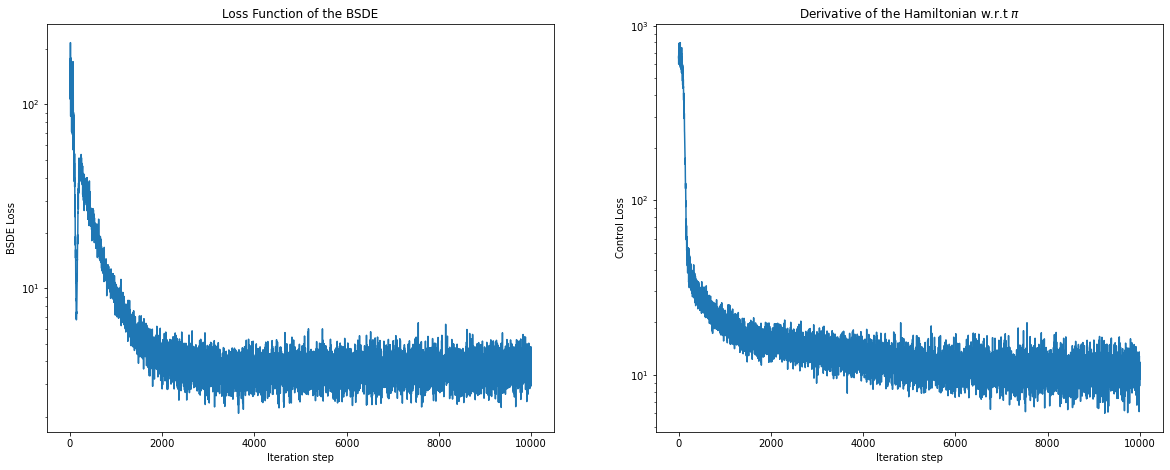

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7.5))

# First plot
axs[0].plot(solver.bsde_losses)
axs[0].set_yscale('log')
axs[0].set_title("Loss Function of the BSDE")
axs[0].set_xlabel("Iteration step")
axs[0].set_ylabel("BSDE Loss")

# Second plot
axs[1].plot(solver.control_losses)
axs[1].set_yscale('log')
axs[1].set_title(r"Derivative of the Hamiltonian w.r.t $\pi$")
axs[1].set_xlabel("Iteration step")
axs[1].set_ylabel("Control Loss")

# Display
plt.show()